# Violence Tweet Classification

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Formats the data into a csv file

In [4]:
train_path = 'data/train/'
test_path = 'data/test/'

def get_texts_to_csv(path, csv_file='data.csv'):
    import csv
    with open(csv_file,mode='w',newline='') as cf:
        writer = csv.writer(cf)
        writer.writerow(["Label","Text"])
        for label in os.listdir(path):
            file_path = path+label
            #with open(file_csv,'w+') as 
            for file in os.listdir(file_path):
                file_path = file_path+'/'+file
                with open(file_path,'r') as txt_file:
                    text = txt_file.read()
                    writer = csv.writer(cf)
                    writer.writerow([label,text])
                file_path = path+label

In [5]:
get_texts_to_csv(train_path,csv_file = 'train_data.csv')
get_texts_to_csv(test_path,csv_file = 'test_data.csv')

## Reading the Data

In [6]:
train_data = pd.read_csv('train_data.csv')
train_data

,Label,Text
0,emotional_violence,he insulted me and then blocked me so i can t ...
1,emotional_violence,can u plss cite me how he insulted gods of kaa...
2,emotional_violence,i don t care how much i know you or love you w...
3,emotional_violence,re how that alledged transwoman who wanted to ...
4,emotional_violence,siberia what it s okay for him to say a bad wo...
...,...,...
31715,Harmful_Traditional_practice,i was incredibly moved by the story of f a col...
31716,Harmful_Traditional_practice,uganda fgm ban why i broke the law to undergo ...
31717,Harmful_Traditional_practice,dear brenden my name is shagufa habibi into or...
31718,Harmful_Traditional_practice,i was born in congo but when i was years old m...


In [7]:
train_data.Label = train_data.Label.astype('category')

<AxesSubplot:>

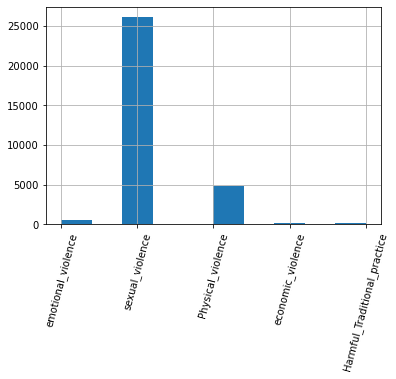

In [14]:
train_data.Label.hist(xrot=75)

Most of them are sexual violence, then physical violence. The least are emotional violence, economic violence and harmful traditional practice

In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters and numbers using regex
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    # Join the cleaned words back into a sentence
    cleaned_text = ' '.join(words)
    return cleaned_text

## Cleaning The Data

In [16]:
train_data['Text'] = train_data['Text'].apply(clean_text)
test_data = pd.read_csv('test_data.csv')
test_data['Text'] = test_data['Text'].apply(clean_text)

In [17]:
from collections import Counter
def word_count(label):
    if label=='all':
        texts = train_data['Text'].copy()
    else:
        texts = train_data['Text'][train_data['Label']==label].copy()
    w_count = Counter()
    for tweet in texts:
        for word in tweet.split():
            w_count[word]+=1
    return w_count

In [18]:
label = ['emotional_violence','sexual_violence','Physical_violence','economic_violence','Harmful_Traditional_practice']
emo_vio = word_count('emotional_violence')
sexual_vio = word_count('sexual_violence')
phy_vio = word_count('Physical_violence')
eco_vio = word_count('economic_violence')
ht = word_count('Harmful_Traditional_practice')
wordcount = word_count('all')

In [19]:
def plot_top_k_words(wordcount,label='',k=20):
    # Get the top k most common words and their respective counts
    most_common_words = wordcount.most_common(k)
    words, counts = zip(*most_common_words)
    # Create the bar plot
    plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
    plt.bar(range(len(words)), counts, tick_label=words)
    plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(f'Top {k} Most Common Words -- {label}')
    plt.tight_layout()  # To prevent clipping of labels
    plt.show()

## Exploratory Data Analysis

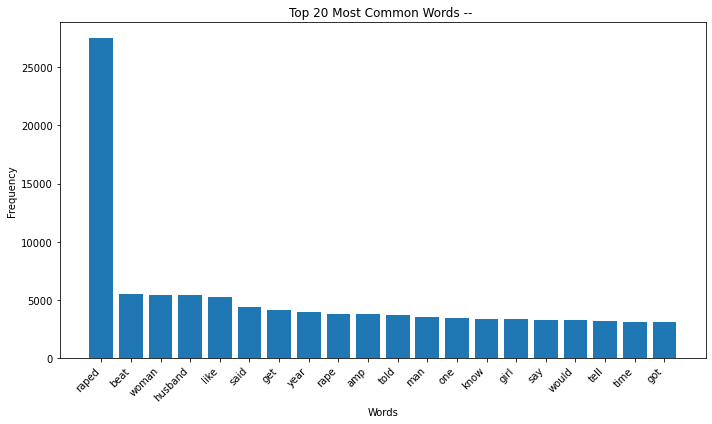

In [20]:
plot_top_k_words(wordcount,k=20)

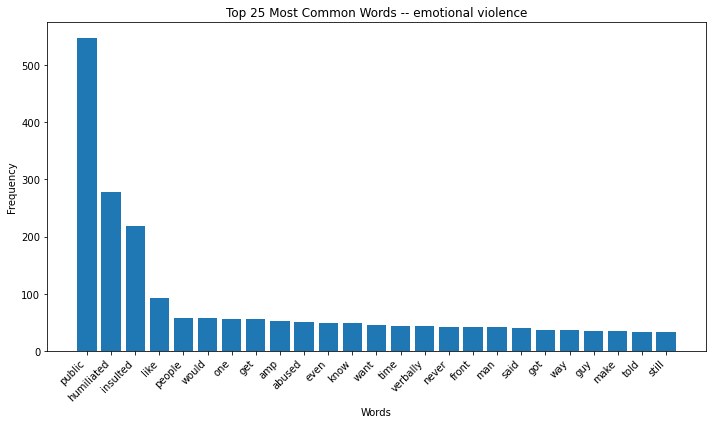

In [21]:
plot_top_k_words(emo_vio,label='emotional violence',k=25)

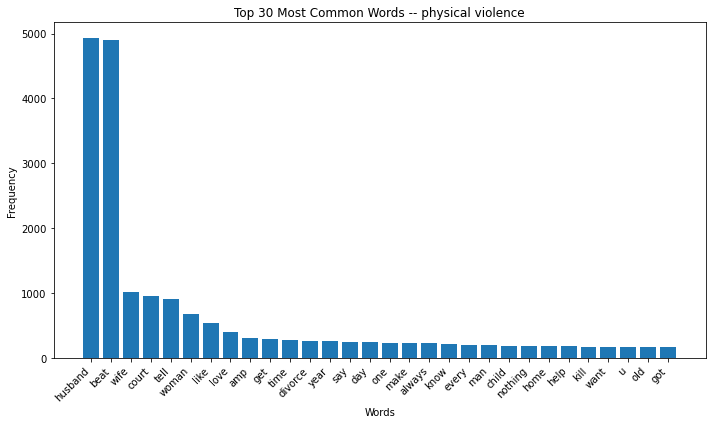

In [22]:
plot_top_k_words(phy_vio,label='physical violence',k=30)

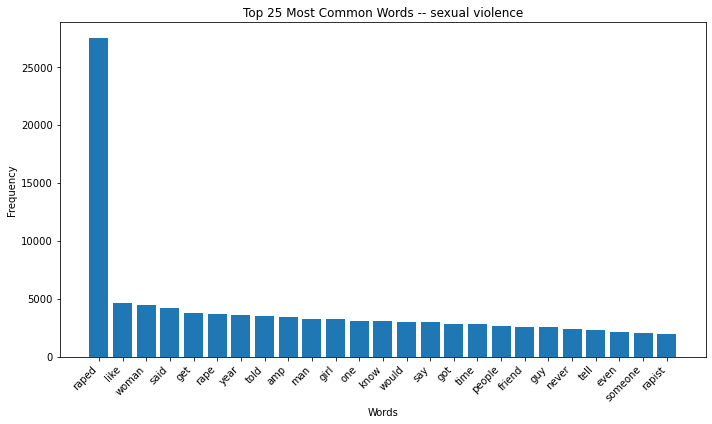

In [23]:
plot_top_k_words(sexual_vio,label='sexual violence',k=25)

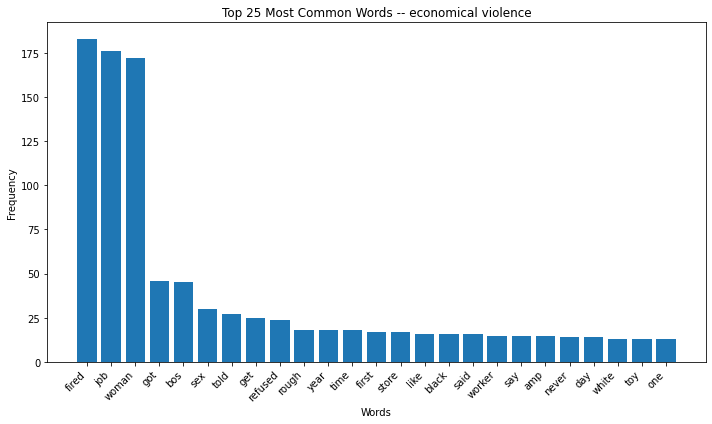

In [24]:
plot_top_k_words(eco_vio,label='economical violence',k=25)

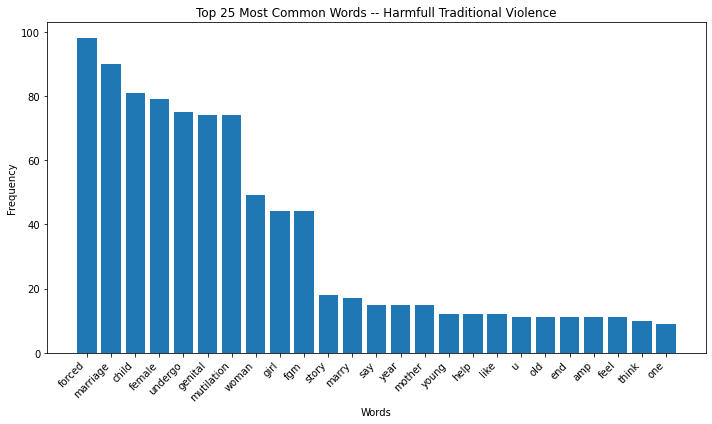

In [25]:
plot_top_k_words(ht,label='Harmfull Traditional Violence',k=25)

In [26]:
X_train = train_data['Text']
y_train = train_data['Label']
X_test = test_data['Text']
y_test = test_data['Label']

## Building ML Model :  Logistic Regression

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix,classification_report

In [28]:
from sklearn.linear_model import LogisticRegression
lr = make_pipeline(TfidfVectorizer(),LogisticRegression(class_weight='balanced'))
lr.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression',
                 LogisticRegression(class_weight='balanced'))])

In [29]:
def classification_metrics(model,X_test,y_test):
    print(classification_report(y_test,model.predict(X_test)))
    cm = confusion_matrix(y_test,lr.predict(X_test))
    cmd = ConfusionMatrixDisplay(cm,display_labels=label)
    cmd.plot(xticks_rotation='vertical')

                              precision    recall  f1-score   support

Harmful_Traditional_practice       0.95      1.00      0.97        38
           Physical_violence       0.98      1.00      0.99      1189
           economic_violence       0.84      1.00      0.91        43
          emotional_violence       0.89      1.00      0.94       130
             sexual_violence       1.00      0.99      1.00      6530

                    accuracy                           0.99      7930
                   macro avg       0.93      1.00      0.96      7930
                weighted avg       0.99      0.99      0.99      7930



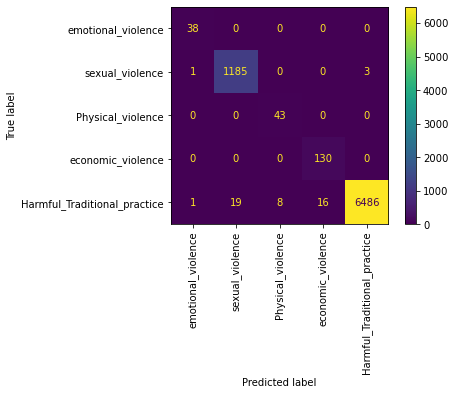

In [30]:
classification_metrics(lr,X_test,y_test)

## Conclusion

At the end of this project, we say that the models performs pretty good. We can still try other model such as Support Vector Machine, RandomForest, and Neural Networks. Or just opitmizing this LogisticRegression model

Tackling text classification may be difficult from accessing quality to model building. 